In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Conv2DTranspose, UpSampling2D
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [60]:
def Autoencoder(input_size=(28, 28, 1)):
    img_input = Input(input_size)

    x = Conv2D(32, (3, 3), padding='same', activation='relu')(img_input)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)
 
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D()(x)


    x = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
     


    x = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    
    
    x = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    model = Model(img_input, x)
    
    model.compile(optimizer=Adam(),
                  loss='mean_squared_error')

    return model

In [61]:
from extra_keras_datasets import emnist

(X_train, y_train), (X_test, y_test) = emnist.load_data(type='balanced')

INFO:root:Loading dataset = emnist


743900280/743900280 [==============================] - 803s 1us/step


In [62]:
noice = 0.5

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_train_pix = X_train.copy()
y_test_pix = X_test.copy()

X_train += np.random.randn(X_train.shape[0],
                           X_train.shape[1],
                           X_train.shape[2],
                           X_train.shape[3]) * noice

X_test += np.random.randn(X_test.shape[0],
                          X_test.shape[1],
                          X_test.shape[2],
                          X_test.shape[3]) * noice

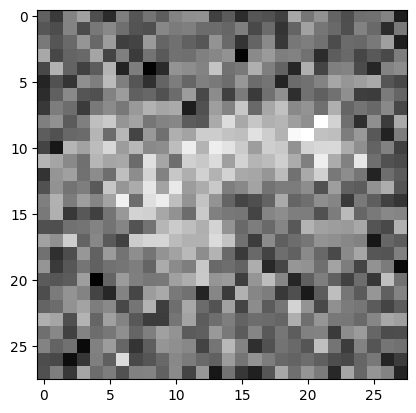

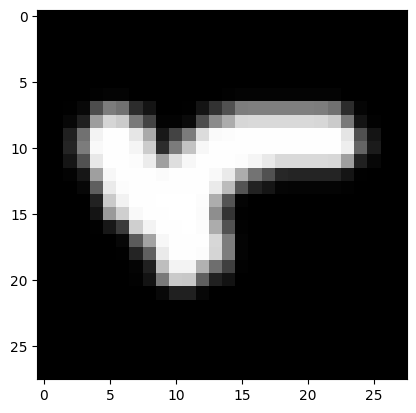

In [63]:
plt.imshow(X_train[0, ..., 0], cmap='gray')
plt.show()
plt.imshow(y_train_pix[0, ..., 0], cmap='gray')
plt.show()

In [64]:
autoencoder = Autoencoder(input_size=(28, 28, 1))
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_16 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_17 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0   

In [65]:
hist = autoencoder.fit(X_train[:10000],
                       y_train_pix[:10000],
                       epochs=10,
                       batch_size=200,
                       validation_data=(X_test, y_test_pix))

Epoch 1/10
50/50 [==============================] - 500s 10s/step - loss: 0.0553 - val_loss: 0.1214
Epoch 2/10
50/50 [==============================] - 547s 11s/step - loss: 0.0179 - val_loss: 0.1275
Epoch 3/10
50/50 [==============================] - 361s 7s/step - loss: 0.0144 - val_loss: 0.1205
Epoch 4/10
50/50 [==============================] - 353s 7s/step - loss: 0.0127 - val_loss: 0.0996
Epoch 5/10
50/50 [==============================] - 401s 8s/step - loss: 0.0119 - val_loss: 0.0785
Epoch 6/10
50/50 [==============================] - 355s 7s/step - loss: 0.0112 - val_loss: 0.0587
Epoch 7/10
50/50 [==============================] - 370s 7s/step - loss: 0.0108 - val_loss: 0.0374
Epoch 8/10
50/50 [==============================] - 369s 7s/step - loss: 0.0105 - val_loss: 0.0235
Epoch 9/10
50/50 [==============================] - 379s 8s/step - loss: 0.0103 - val_loss: 0.0164
Epoch 10/10
50/50 [==============================] - 396s 8s/step - loss: 0.0102 - val_loss: 0.0130


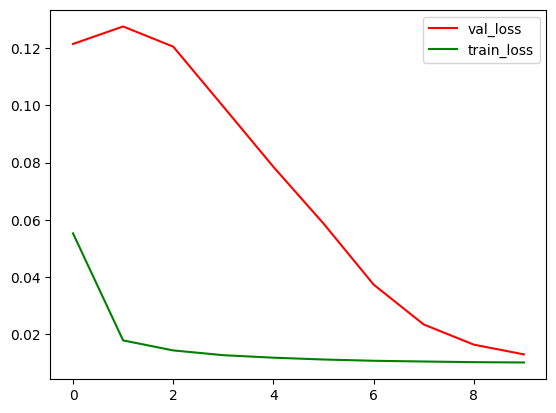

In [66]:
plt.plot(hist.history['val_loss'], 'r', label='val_loss')
plt.plot(hist.history['loss'], 'g', label='train_loss')
plt.legend()
plt.show()

In [67]:
y_pred = autoencoder.predict(X_test)

588/588 [==============================] - 187s 310ms/step


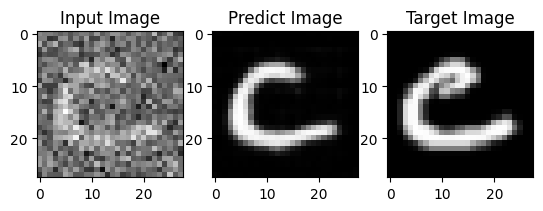

In [69]:
idx = 30

fig, ax = plt.subplots(1, 3)

ax[0].imshow(X_test[idx, ..., 0], cmap='gray')
ax[0].set_title('Input Image')

ax[1].imshow(y_pred[idx, ... ,0], cmap='gray')
ax[1].set_title('Predict Image')

ax[2].imshow(y_test_pix[idx, ..., 0], cmap='gray')
ax[2].set_title('Target Image')

plt.show()

In [ ]:
# При увеличении числа слоев можно вычленять более сложные нелинейные закономерности.
# Буквы на зашумленных изображениях достаточно хорошо проглядываются, автоэнкодер неплохо убрал шум и они стали вполне читаемыми.